# Comprehensive Mobile Price Analysis

*  battery_power - Total energy a battery can store in one time measured in mAh,
*   blue - Has bluetooth or not,
*   clock_speed - speed at which microprocessor executes instructions,
*   dual_sim - Has dual sim support or not,
*   fc - Front Camera mega pixels,
*   four_g - Has 4G or not
*   int_memory - Internal Memory in Gigabytes,
*   m_dep - Mobile Depth in cm,
*   mobile_wt - Weight of mobile phone,
*   n_cores - Number of cores of processo,
*   pc - Primary Camera mega pixels,
*   px_height - Pixel Resolution Height,
*   px_width - Pixel Resolution Width,
*   ram - Random Access Memory in Megabytes,
*   sc_h - Screen Height of mobile in cm,
*   sc_w - Screen Width of mobile in cm,
*   talk_time - longest time that a single battery charge will last when you are talking,
*   three_g - Has 3G or not,
*   touch_screen - Has touch screen or not,
*   wifi - Has wifi or not,
*   price_range


In [3]:
# import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import *

## Data Loading And Exploration:

In [4]:
# Data loading
df = pd.read_csv(r'/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
# Display the column names (features)
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# Identify the target variable
target_variable = 'price_range'
print("Target Variable:", target_variable)

Target Variable: price_range


In [8]:
# basic descriptive statistics
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Data Cleaning And Preprocessing:

In [9]:
# Address missing or null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [39]:
# Transform data into necessary format using suitable methods
columns_to_convert = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
df[columns_to_convert] = df[columns_to_convert].astype(bool)

df.dtypes

battery_power      int64
blue                bool
clock_speed      float64
dual_sim            bool
fc                 int64
four_g              bool
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g             bool
touch_screen        bool
wifi                bool
price_range        int64
dtype: object

## Statistical Analysis With NumPy And SciPy:

Execute detailed statistical analysis on each feature, including:
* Calculation of central tendency measures (mean, median, mode).
* Analysis of variability (range, variance, standard deviation).
* Evaluation of distribution shapes through skewness and kurtosis.




In [40]:
# Central tendency measures
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())
print("\nMode:\n", df.mode().iloc[0])

Mean:
 battery_power    1238.51850
blue                0.49500
clock_speed         1.52225
dual_sim            0.50950
fc                  4.30950
four_g              0.52150
int_memory         32.04650
m_dep               0.50175
mobile_wt         140.24900
n_cores             4.52050
pc                  9.91650
px_height         645.10800
px_width         1251.51550
ram              2124.21300
sc_h               12.30650
sc_w                5.76700
talk_time          11.01100
three_g             0.76150
touch_screen        0.50300
wifi                0.50700
price_range         1.50000
dtype: float64

Median:
 battery_power    1226.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         564.0
px_width         1247.0
ram              2146.5
sc_h               12.0
sc_w                

In [41]:
# Variability measures
print("\nVariance:\n", df.var())
print("\nStandard Deviation:\n", df.std())


Variance:
 battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

Standard Deviation:
 battery_power     439.418206
blue                0.500100
clock_speed         0.816004
dual_sim            0.500035
fc                  4.341444
four_g              0.499662
int_memory         18.145715
m_dep               0.288416
mobile_wt          35.399655
n_cores             2.287837
pc                  6.064315
px

In [42]:
# Distribution shapes
print("Skewness:\n", df.skew())
print("\nKurtosis:\n", df.kurtosis())

Skewness:
 battery_power    0.031898
blue             0.020016
clock_speed      0.178084
dual_sim        -0.038035
fc               1.019811
four_g          -0.086144
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
three_g         -1.228142
touch_screen    -0.012009
wifi            -0.028024
price_range      0.000000
dtype: float64

Kurtosis:
 battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523


# Data Visualization With Matplotlib:
* Produce histograms, scatter plots, and box plots for data distribution and relationship insights.
* Employ heatmaps for correlation visualization.
* Ensure clarity in plots with appropriate titles, labels, and axis information.

In [43]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,False,2.2,False,1,False,7,0.6,188,2,...,20,756,2549,9,7,19,False,False,True,1
1,1021,True,0.5,True,0,True,53,0.7,136,3,...,905,1988,2631,17,3,7,True,True,False,2
2,563,True,0.5,True,2,True,41,0.9,145,5,...,1263,1716,2603,11,2,9,True,True,False,2
3,615,True,2.5,False,0,False,10,0.8,131,6,...,1216,1786,2769,16,8,11,True,False,False,2
4,1821,True,1.2,False,13,True,44,0.6,141,2,...,1208,1212,1411,8,2,15,True,True,False,1


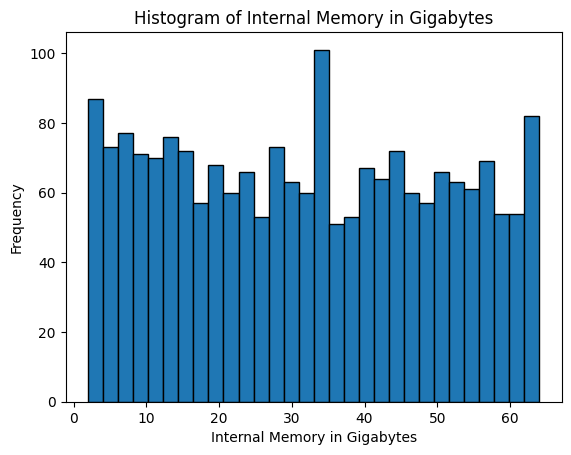

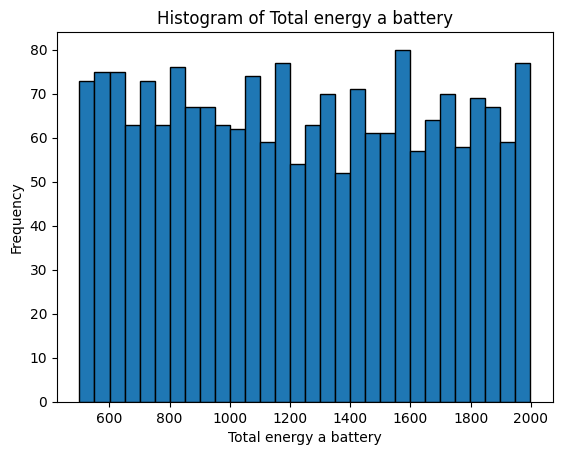

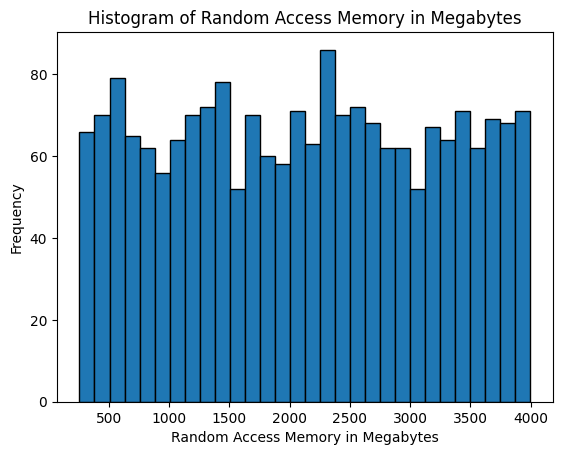

In [44]:
# Histograms
plt.hist(df['int_memory'], bins=30, edgecolor='black')
plt.title('Histogram of Internal Memory in Gigabytes')
plt.xlabel('Internal Memory in Gigabytes')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['battery_power'], bins=30, edgecolor='black')
plt.title('Histogram of Total energy a battery')
plt.xlabel('Total energy a battery')
plt.ylabel('Frequency')
plt.show()

plt.hist(df['ram'], bins=30, edgecolor='black')
plt.title('Histogram of Random Access Memory in Megabytes')
plt.xlabel('Random Access Memory in Megabytes')
plt.ylabel('Frequency')
plt.show()

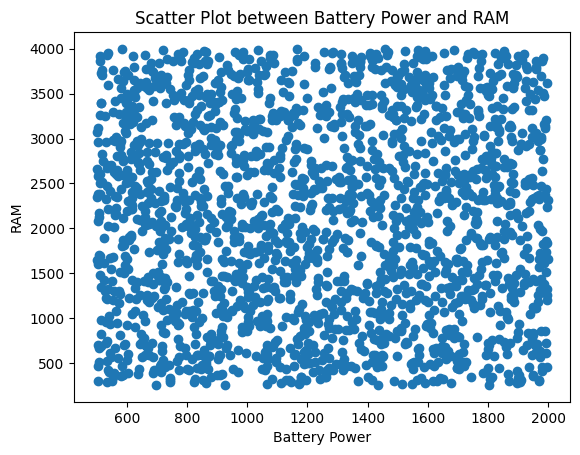

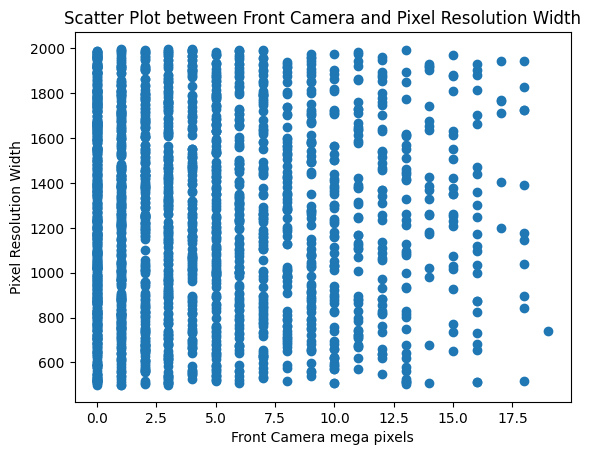

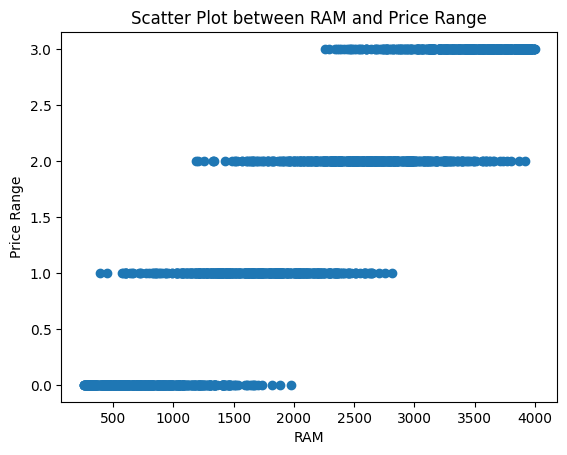

In [48]:
# Scatter plots
plt.scatter(df['battery_power'], df['ram'])
plt.title('Scatter Plot between Battery Power and RAM')
plt.xlabel('Battery Power')
plt.ylabel('RAM')
plt.show()

plt.scatter(df['fc'], df['px_width'])
plt.title('Scatter Plot between Front Camera and Pixel Resolution Width')
plt.xlabel('Front Camera mega pixels')
plt.ylabel('Pixel Resolution Width')
plt.show()

plt.scatter(df['ram'], df['price_range'])
plt.title('Scatter Plot between RAM and Price Range')
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.show()

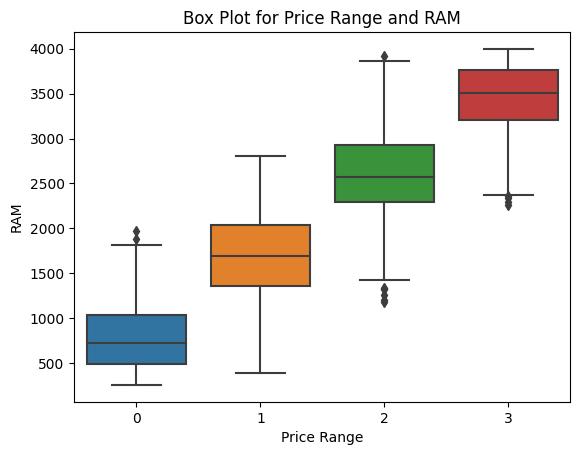

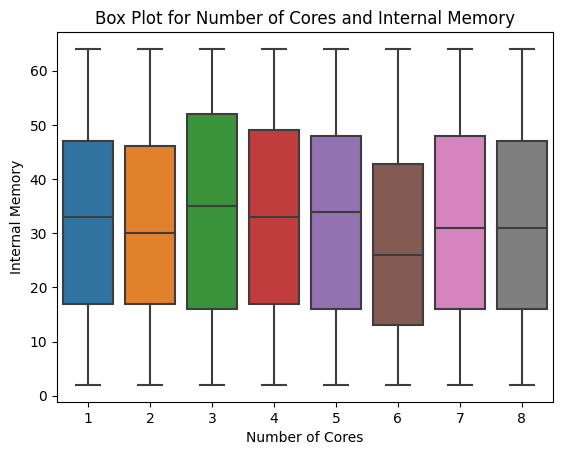

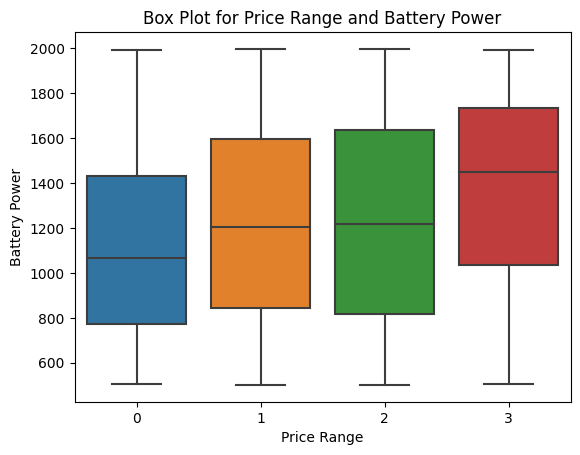

In [54]:
# Box plots
sns.boxplot(x='price_range', y='ram', data=df)
plt.title('Box Plot for Price Range and RAM')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.show()

sns.boxplot(x='n_cores', y='int_memory', data=df)
plt.title('Box Plot for Number of Cores and Internal Memory')
plt.xlabel('Number of Cores')
plt.ylabel('Internal Memory')
plt.show()

sns.boxplot(x='price_range', y='battery_power', data=df)
plt.title('Box Plot for Price Range and Battery Power')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()

# Insight Synthesis And Conclusion:
* Derive conclusions from statistical tests and visualizations.
* Identify key determinants in mobile price classification.
* Highlight any unexpected or significant findings.

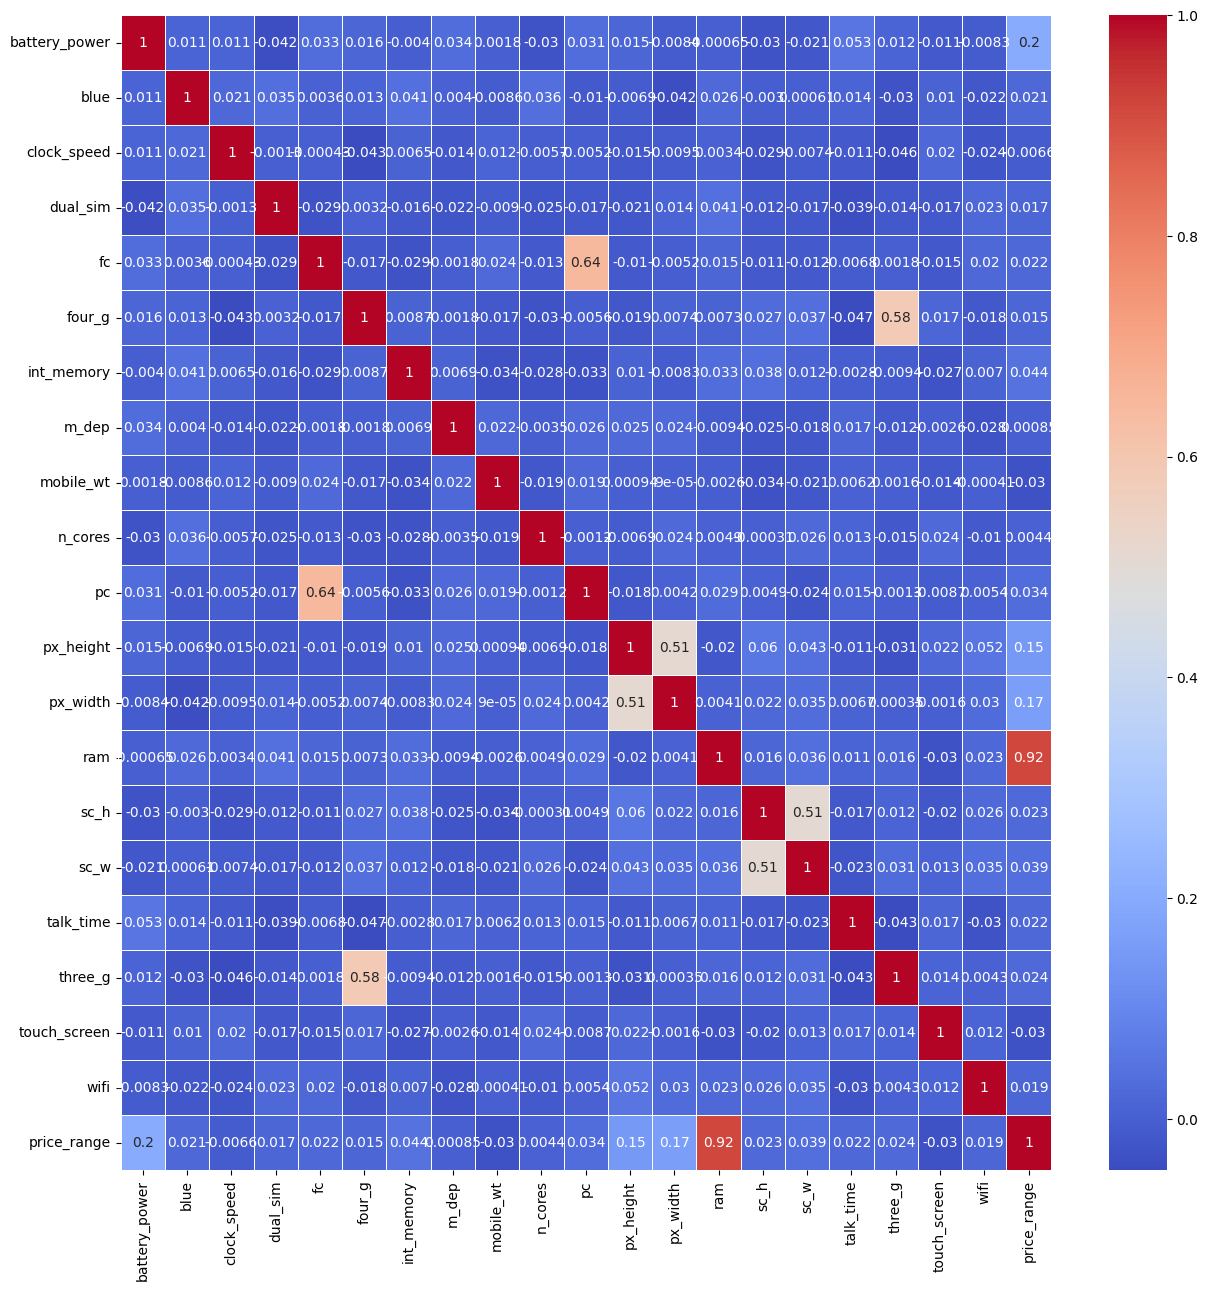

In [63]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

The biggest correlation is between price range and ram.